In [1]:
# https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
energia=pd.read_csv('C:/Users/Falcone/Documents/0_MachineLearning/2022.08.05_SeriesTemporais/ConsumoEnergia/energy_dataset.csv')
clima=pd.read_csv('C:/Users/Falcone/Documents/0_MachineLearning/2022.08.05_SeriesTemporais/ConsumoEnergia/weather_features.csv')

## Dados do dataset de Energia

In [3]:
pd.set_option('display.max_columns',29)
#energia.head()
energia

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,NaN,1.0,1135.0,4836.0,0.0,6073.0,63.0,95.0,85.0,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,NaN,1.0,1172.0,3931.0,0.0,6074.0,62.0,95.0,33.0,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,NaN,50.0,1148.0,2831.0,0.0,6076.0,61.0,94.0,31.0,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,NaN,108.0,1128.0,2068.0,0.0,6075.0,61.0,93.0,31.0,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [4]:
energia.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

In [5]:
#Atualizaçao dos energia de tempo da tabela num formato de tempo do pandas
energia['time']=pd.to_datetime(energia['time'])
energia['time']
#O que mudou em relação aos energia originais??

0        2015-01-01 00:00:00+01:00
1        2015-01-01 01:00:00+01:00
2        2015-01-01 02:00:00+01:00
3        2015-01-01 03:00:00+01:00
4        2015-01-01 04:00:00+01:00
                   ...            
35059    2018-12-31 19:00:00+01:00
35060    2018-12-31 20:00:00+01:00
35061    2018-12-31 21:00:00+01:00
35062    2018-12-31 22:00:00+01:00
35063    2018-12-31 23:00:00+01:00
Name: time, Length: 35064, dtype: object

In [6]:
energia

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,NaN,1.0,1135.0,4836.0,0.0,6073.0,63.0,95.0,85.0,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,NaN,1.0,1172.0,3931.0,0.0,6074.0,62.0,95.0,33.0,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,NaN,50.0,1148.0,2831.0,0.0,6076.0,61.0,94.0,31.0,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,NaN,108.0,1128.0,2068.0,0.0,6075.0,61.0,93.0,31.0,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [7]:
energia.dtypes #O que mudou em relação aos energia originais??

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

In [8]:
energia.isnull()
#como o resultado do isnull é falso para os valores '0.0'????

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
35060,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
35061,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
35062,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [9]:
pd.isnull(energia) #outra forma de gerar o mesmo resultado do codigo anterior

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
35060,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
35061,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
35062,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [10]:
energia.isnull().sum()/len(energia['time'])*100

time                                             0.000000
generation biomass                               0.054187
generation fossil brown coal/lignite             0.051335
generation fossil coal-derived gas               0.051335
generation fossil gas                            0.051335
generation fossil hard coal                      0.051335
generation fossil oil                            0.054187
generation fossil oil shale                      0.051335
generation fossil peat                           0.051335
generation geothermal                            0.051335
generation hydro pumped storage aggregated     100.000000
generation hydro pumped storage consumption      0.054187
generation hydro run-of-river and poundage       0.054187
generation hydro water reservoir                 0.051335
generation marine                                0.054187
generation nuclear                               0.048483
generation other                                 0.051335
generation oth

array([[<AxesSubplot:title={'center':'generation fossil peat'}>]],
      dtype=object)

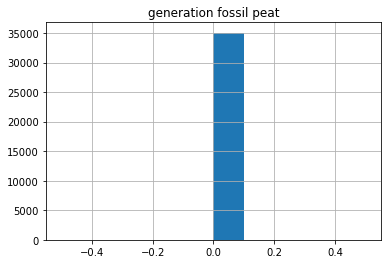

In [11]:
energia.hist('generation fossil peat')
#energia.hist('generation biomass')

In [12]:
eixo_x = list(range(0,35064))

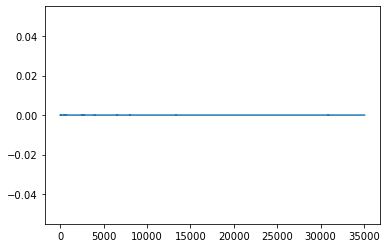

In [13]:
plt.plot(eixo_x,energia['generation fossil peat'])
#plt.plot(eixo_x,energia['generation biomass'])

In [14]:
#Contagem de zeros, pois a função isnull() nao conseguiu identificar corretamente esses energia com valores=0
energia[energia==0].count() / len(energia['time'])*100

time                                            0.000000
generation biomass                              0.011408
generation fossil brown coal/lignite           29.993726
generation fossil coal-derived gas             99.948665
generation fossil gas                           0.002852
generation fossil hard coal                     0.008556
generation fossil oil                           0.008556
generation fossil oil shale                    99.948665
generation fossil peat                         99.948665
generation geothermal                          99.948665
generation hydro pumped storage aggregated      0.000000
generation hydro pumped storage consumption    35.954255
generation hydro run-of-river and poundage      0.008556
generation hydro water reservoir                0.008556
generation marine                              99.945813
generation nuclear                              0.008556
generation other                                0.011408
generation other renewable     

In [15]:
energia1=energia.drop(['generation fossil brown coal/lignite','generation fossil coal-derived gas','generation fossil oil shale',
                  'generation fossil peat','generation geothermal','generation hydro pumped storage aggregated',
                   'generation hydro pumped storage consumption','generation marine','generation wind offshore',
                   'forecast wind offshore eday ahead'],axis=1)
energia1

,time,generation biomass,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,4844.0,4821.0,162.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,5196.0,4755.0,158.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,4857.0,4581.0,157.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,4314.0,4131.0,160.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,4130.0,3840.0,156.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,7634.0,2628.0,178.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,7241.0,2566.0,174.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,7025.0,2422.0,168.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,6562.0,2293.0,163.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89


In [16]:
energia1.isnull().sum()/len(energia1['time'])*100

time                                          0.000000
generation biomass                            0.054187
generation fossil gas                         0.051335
generation fossil hard coal                   0.051335
generation fossil oil                         0.054187
generation hydro run-of-river and poundage    0.054187
generation hydro water reservoir              0.051335
generation nuclear                            0.048483
generation other                              0.051335
generation other renewable                    0.051335
generation solar                              0.051335
generation waste                              0.054187
generation wind onshore                       0.051335
forecast solar day ahead                      0.000000
forecast wind onshore day ahead               0.000000
total load forecast                           0.000000
total load actual                             0.102669
price day ahead                               0.000000
price actu

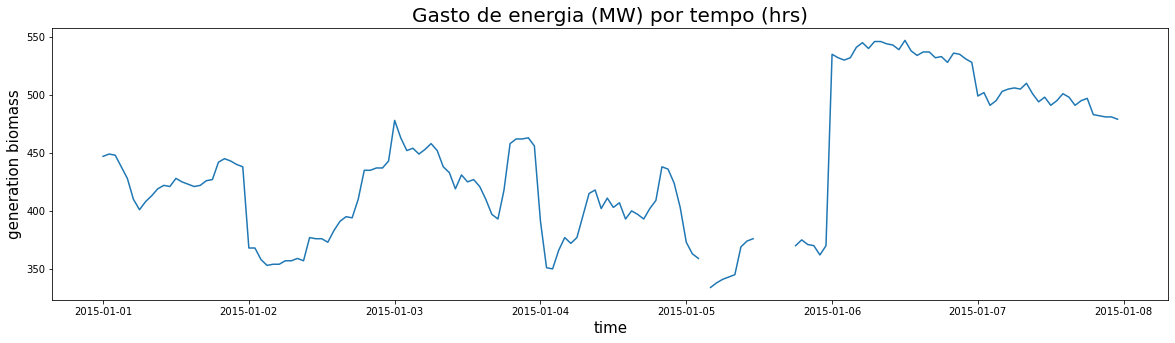

In [17]:
#Visualização dos energia no grafico
#import datetime
nomex='time'
nomey='generation biomass'
x=energia1[:24*7][nomex] #trecho de tempo 24h vezes 7 dias
y=energia1[:24*7][nomey]
plt.figure(figsize=(20,5))
plt.plot(x,y)
plt.xlabel(nomex, fontsize=15)
plt.ylabel(nomey, fontsize=15)
plt.title('Gasto de energia (MW) por tempo (hrs)', fontsize=20)
#Mudança da escala dos eixos y e x. Ativar os codigos quando for dar zoom in/out.
ax = plt.gca()
#ax.set(ylim=(900, 1100))
#ax.set_xlim([datetime.date(2015, 1, 1), datetime.date(2015, 1, 2)])

In [ ]:
#Preencher energia faltantes com valores de interpolação, pois como visto acima no grafico, os energia temporais possuem
#uma continuidade na linha plotada
energia1.interpolate(method='linear',limit_direction='forward',inplace=True)

In [ ]:
#Visualização dos energia no grafico
nomex='time'
nomey='generation biomass'
x=energia1[:24*7][nomex] #trecho de tempo 24h vezes 7 dias
y=energia1[:24*7][nomey]
plt.figure(figsize=(20,5))
plt.plot(x,y)
plt.xlabel(nomex, fontsize=15)
plt.ylabel(nomey, fontsize=15)
plt.title('Gasto de energia (MW) por tempo (hrs)', fontsize=20)
#Mudança da escala dos eixos y e x. Ativar os codigos quando for dar zoom in/out.
ax = plt.gca()

In [ ]:
energia2=energia1.set_index('time')

In [ ]:
energia2.index = pd.to_datetime(energia2.index, utc=True) #transformaçao do tipo do indice em datetime

## Dados do dataset de Clima

In [ ]:
pd.set_option('display.max_columns',17)
#clima.head(35150)
clima

In [ ]:
clima.dtypes

In [ ]:
#Converter dados int64 em float64
colunas_int=clima.select_dtypes(include=[np.int64]).columns
for coluna in colunas_int:
    clima[coluna]=clima[coluna].values.astype(np.float64)

In [ ]:
#Converter dados de tempo no formato de tempo do pandas
clima['time']=pd.to_datetime(clima['dt_iso'])
clima.drop(['dt_iso'], axis=1, inplace=True)
#Neste comando a coluna 'time' ainda nao tinha virado indice da tabela

In [ ]:
clima.dtypes

In [ ]:
#Atualizaçao dos energia de tempo da tabela num formato de tempo do pandas
#clima['time']=pd.to_datetime(clima['time'], utc=True)
#clima['time']
#O que mudou em relação aos energia originais??

In [ ]:
display(clima.time.min()) #valor minimo da coluna de datas

In [ ]:
display(clima.time.max()) #valor maximo da coluna de datas

In [ ]:
city_name=clima['city_name'].unique()
print('Numero de textos:',len(city_name))
city_name

In [ ]:
weather_main=clima['weather_main'].unique()
print('Numero de textos:',len(weather_main))
weather_main

In [ ]:
weather_description=clima['weather_description'].unique()
print('Numero de textos:',len(weather_description))
weather_description

In [ ]:
clima['weather_description'].value_counts()#(sort=False)

In [ ]:
weather_icon=clima['weather_icon'].unique()
print('Numero de textos:',len(weather_icon))
weather_icon

In [ ]:
wind_deg=clima['wind_deg'].unique()
print('Numero de textos:',len(wind_deg))
wind_deg

In [ ]:
clima.dtypes

In [ ]:
clima=clima.drop(['weather_id','weather_main','weather_icon'], axis=1)

In [ ]:
#Verificando quantas amostras há em cada cidade
clima_agrupado=clima.groupby('city_name')
nomes_cidades=clima['city_name'].unique()
for nome in nomes_cidades:
    print(nome,clima_agrupado.get_group(nome).shape[0])
print('Dataset energia',energia.shape[0])

In [ ]:
#Removendo linhas duplicadas, uma vez que a quantidade de linhas de cada cidade esta diferente do dataset de energia
clima=clima.drop_duplicates(subset=['time','city_name'],keep='first')

In [ ]:
#Verificando quantas amostras há em cada cidade
clima_agrupado=clima.groupby('city_name')
nomes_cidades=clima['city_name'].unique()
for nome in nomes_cidades:
    print(nome,clima_agrupado.get_group(nome).shape[0])
print('Dataset energia',energia.shape[0])

In [ ]:
#Colocando a coluna 'time' como indice da tabela
#clima.set_index('time', inplace=True)
clima=clima.set_index('time')
clima.head()

In [ ]:
clima.dtypes

In [ ]:
clima.index.dtype

In [ ]:
type(clima.index) #O tipo tem que ser: pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
clima.index = pd.to_datetime(clima.index, utc=True) #transformaçao do tipo do indice em datetime

In [ ]:
type(clima.index) #O tipo tem que ser: pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
clima.index[2]

In [ ]:
clima_agrupado=clima.groupby('city_name')
df_cidade=clima_agrupado.get_group('Madrid') #['Valencia', 'Madrid', 'Bilbao', ' Barcelona', 'Seville']
#df_cidade_loc=df_cidade.loc['2015-01-01':'2015-01-01'] #month,day,year!!
df_cidade_loc=df_cidade.loc['2015-01-09':'2015-01-10'] #month,day,year!!
df_cidade_loc

In [ ]:
nomey='pressure'
plt.figure(figsize=(20,5))
plt.plot(df_cidade_loc[nomey])
titulo=df_cidade_loc.iloc[0,0]
plt.title(titulo, fontsize=20)
plt.xlabel('time', fontsize=15)
plt.ylabel(nomey, fontsize=15)

In [ ]:
#Aplicando label encoding na variavel 'weather description' - transforma strings em numeros
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#clima1=clima #este codigo nao funciona corretamente, pq a alteraçao em clima1 tb incide em clima
#clima1=clima.drop(['temp_min'],axis=1) #Antes de rodar alguma mudança clima1=clima, a coluna 'weather_description' do datset de clima tb estava sendo alterada
clima1=clima.copy() #Solução encontrada na internet
clima1['weather_description']=le.fit_transform(clima1['weather_description'])

In [ ]:
clima1.head(50)

In [ ]:
clima.head() #porque a coluna weather_description tb mudou no dataset clima??

In [ ]:
clima1.hist(column='weather_description')

In [ ]:
#Criando 5 datasets distintos, um para cada cidade
df1,df2,df3,df4,df5=[x for _,x in clima1.groupby('city_name')] # 'x' é o dataset agrupado da cidade e '_' é o nome da cidade
#['5-Valencia', '3-Madrid', '2-Bilbao', ' 1-Barcelona', '4-Seville'] resultado em ordem alfabetica das cidades

In [ ]:
df5.head()

In [ ]:
datasets_clima=[df1,df2,df3,df4,df5] #Agrupamento dos datasets

In [ ]:
type(datasets_clima)

In [ ]:
datasets_clima

In [ ]:
#Inserção do sufixo da cidade em cada variavel(feature)
dataset_final=energia2 #começando a concatenaçao com o dataset de energia
for df in datasets_clima:
    nome_cidade=df['city_name'][0] #pegando o nome da cidade
    nome_cidade=str(nome_cidade).replace("''",'').replace(' ','') #eliminando as aspas e espaços no nome da cidade
    df=df.add_suffix('_{}'.format(nome_cidade)) #adicionando o nome da cidade ao lado de cada nome de coluna no dataset
    dataset_final=dataset_final.merge(df,on='time') #agrupando os datasets com base no indice 'time'
    #ValueError: You are trying to merge on object and datetime64[ns, UTC] columns. If you wish to proceed you should use pd.concat
    #dataset_final=dataset_final.concat(df,on='time') #agrupando os datasets com base no indice 'time'
    dataset_final=dataset_final.drop('city_name_{}'.format(nome_cidade),axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
dataset_final

## Inicio do aprendizado de maquina

In [ ]:
#Criando uma função para calcular a performance das previsões
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(valores_previstos,valores_reais):
    rmse=sqrt(mean_squared_error(valores_previstos,valores_reais))
    print('O RMSE calculado é:',rmse)

In [ ]:
#Verificando a performance do modelo oficial da TSO
rmse(dataset_final['price day ahead'],dataset_final['price actual'])

In [ ]:
#Eliminando a coluna de previsoes de preço feita pela TSO
dataset_final1=dataset_final.drop('price day ahead',axis=1)

In [ ]:
dataset_final1

In [ ]:
#Normalizaçao dos dados
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dataset_final1_norm=scaler.fit_transform(dataset_final1.values) # O resultado deste codigo será um array de vetores
dataset_final1_norm

In [ ]:
dataset_final1_norm.shape

In [ ]:
#Transformando o resultado anterior em um dataframe pandas
dataset_final1_norm2=pd.DataFrame(dataset_final1_norm, index=dataset_final1.index, columns=dataset_final1.columns)

In [ ]:
dataset_final1_norm2

In [ ]:
# Separando os dados entre treino e teste
# Vamos separar 33% para teste. Em vez de coletar amostras aleatoriamente com a função train_test_split, iremos coletar do início
#até 67% dos dados para treino e deixar o final para teste. 
tamanho_treino = int(len(dataset_final1_norm2) * 0.7)
treino, teste = dataset_final1_norm2[0:tamanho_treino], dataset_final1_norm2[tamanho_treino:len(dataset_final1_norm2)]
treino = treino.reset_index(drop=True)
teste = teste.reset_index(drop=True) # Como depois iremos usar o comando .loc, precisaremos que os índices estejam iniciando em zero em ambos os dataframes (treino e teste)

In [ ]:
treino.head(20)

In [ ]:
treino.describe()

In [ ]:
teste

In [ ]:
# Criando uma função para as janelas temporais.
def gera_dataset(dataset, tamanho_janela = 1):
    dataA, dataB = [], []
    for i in range(len(dataset)-tamanho_janela): # lembre-se que os datasets têm índices começando em zero
        a = dataset[i:(i+tamanho_janela)].to_numpy()
        dataA.append(a)
        dataB.append(dataset['price actual'].loc[[i+tamanho_janela]].to_numpy()) #armazena apenas o dado localizado na linha i + tamanho_janela (esse não foi pego por dataA).
    return np.asarray(dataA, dtype=np.float32), np.asarray(dataB, dtype=np.float32)

In [ ]:
#Aplicaçao da funçao gera dataset
tamanho_janela=10
x_treino,y_treino=gera_dataset(treino,tamanho_janela=tamanho_janela)
x_teste,y_teste=gera_dataset(teste,tamanho_janela=tamanho_janela)

In [ ]:
x_treino[0]

In [ ]:
y_treino

In [ ]:
x_treino.shape #gera vetores de 10 elementos, ordenados sequencialmente no tempo, para todo o dataset de treino

In [ ]:
y_treino.shape

In [ ]:
x_teste.shape

In [ ]:
#Criando o modelo LSTM
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
modelo=Sequential()
modelo.add(LSTM(20,input_shape=(x_treino.shape[1], x_treino.shape[2])))
#Em input_shape precisamos informar apenas 2 valores: n_timesteps e n_features da variavel X (entrada)
modelo.add(Dense(1)) #Saída da LSTM
modelo.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
modelo.fit(x_treino, y_treino, epochs = 50, batch_size = 500, verbose = 2, shuffle=False)

In [ ]:
treino.columns.get_loc("price actual")

In [ ]:
y_treino.shape

In [ ]:
# Fazendo as previsões e avaliando a performance
import math
# A previsão tem como resultado um array de dimensões (n_amostras, 1), então se tentarmos executar o inverso da normalização
# diretamente com esses dados, teremos uma mensagem de erro, afinal a normalização foi aplicada em um dataset de dimensões:
# (n_amostras, 79), ou seja, a função scaler.inverse_transform não saberá o que fazer para gerar o inverso das outras 78 colunas.
# Portanto iremos primeiro gerar uma matriz com a mesma quantidade de colunas de x_treino (preenchida com zeros), depois iremos
# colocar o array de previsões em uma coluna dessa matriz (no lugar onde estava o price_actual), então poderemos aplicar a função
# scaler.inverse_transform e depois coletar somente a coluna que nos interessa.
# Obs: para descobrir qual o índice da coluna que possui a feature "price actual", basta utilizar o código: 
col=treino.columns.get_loc("price actual")

# Previsões com os dados de treino:
previsoes_treino = modelo.predict(x_treino)
previsoes_treino_dataset_size = np.zeros(shape=(len(previsoes_treino), x_treino.shape[2]))
previsoes_treino_dataset_size[:,col] = previsoes_treino[:,0]
previsoes_treino = scaler.inverse_transform(previsoes_treino_dataset_size)[:,col]

# Previsões com os dados de teste:
previsoes_teste = modelo.predict(x_teste)
previsoes_teste_dataset_size = np.zeros(shape=(len(previsoes_teste), x_teste.shape[2]))
previsoes_teste_dataset_size[:,col] = previsoes_teste[:,0]
previsoes_teste = scaler.inverse_transform(previsoes_teste_dataset_size)[:,col]

# Invertendo a normalização das variáveis target:
y_treino_dataset_size = np.zeros(shape=(len(y_treino), x_treino.shape[2]))
y_treino_dataset_size[:,col] = y_treino[:,0]
y_treino = scaler.inverse_transform(y_treino_dataset_size)[:,col]

y_teste_dataset_size = np.zeros(shape=(len(y_teste), x_teste.shape[2]))
y_teste_dataset_size[:,col] = y_teste[:,0]
y_teste = scaler.inverse_transform(y_teste_dataset_size)[:,col]

# Calculando o RMSE:
score_treino = math.sqrt(mean_squared_error(y_treino, previsoes_treino))
print('Score em Treino: %.2f RMSE' % (score_treino))  
score_teste = math.sqrt(mean_squared_error(y_teste, previsoes_teste))
print('Score em Teste: %.2f RMSE' % (score_teste))

In [ ]:
print(previsoes_teste[:20])
print(len(previsoes_teste))

In [ ]:
print(y_teste[:20])
print(len(y_teste))